In [1]:
import numpy as np

In [2]:
X = 2*np.random.rand(100,1) #Gives values in a shape

In [3]:
y=4+3*X+np.random.randn(100,1)

In [4]:
X_b = np.c_[np.ones((100,1)),X] #Concatenation along the second axis

In [5]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[3.96824496],
       [2.92200953]])

In [7]:
x_new = np.array([[0],[2]])

In [8]:
x_new_b = np.c_[np.ones((2,1)), x_new]

In [9]:
y_predict = x_new_b.dot(theta_best)

In [10]:
y_predict

array([[3.96824496],
       [9.81226401]])

In [11]:
import matplotlib.pyplot as plt

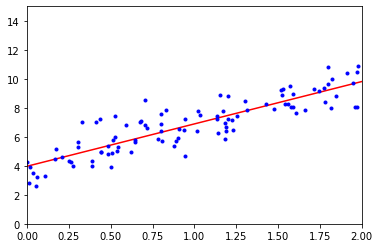

In [12]:
plt.plot(x_new, y_predict, "r-")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

#### Using scikit learn for linear regresssion

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lin_alg = LinearRegression()

In [15]:
lin_alg.fit(X,y)

LinearRegression()

In [16]:
lin_alg.intercept_, lin_alg.coef_

(array([3.96824496]), array([[2.92200953]]))

In [17]:
U, sigma, v_t = np.linalg.svd(X_b)

In [18]:
eta = 0.15
n_iter = 100
m = 100

In [19]:
theta = np.random.rand(2,1)

In [20]:
for iterations in range(n_iter):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

In [21]:
theta

array([[3.95882705],
       [2.93020373]])

## For non linear data

In [22]:
import numpy as np
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5 * X ** 2 + X + 2 +np.random.randn(m,1)

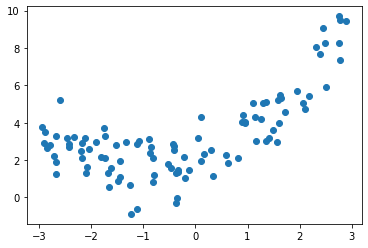

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly_features = PolynomialFeatures(degree=2, include_bias = False)

In [26]:
X_poly = poly_features.fit_transform(X)

In [27]:
X_poly.shape

(100, 2)

In [28]:
from sklearn.linear_model import LinearRegression
lin_alg = LinearRegression()
lin_alg.fit(X_poly, y)
print(lin_alg.intercept_, lin_alg.coef_)

[2.05051827] [[0.9482888  0.49448539]]


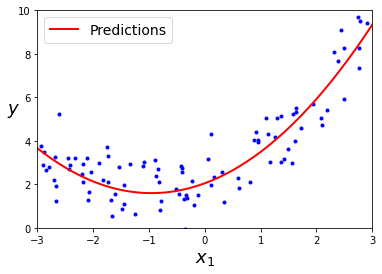

In [29]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_alg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [30]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)

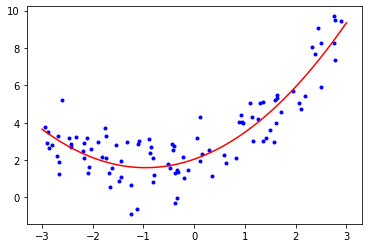

In [31]:
plt.plot(X,y,"b.")
plt.plot(np.linspace(-3,3,100).reshape(100,1),y_new, "r-")

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    train_errors , val_errors = [] , []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m] , y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=1, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label="val")
    plt.show()

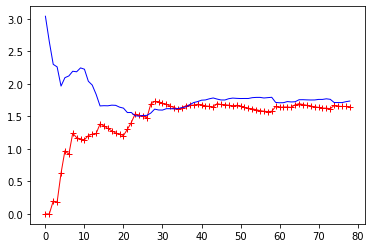

In [33]:
plot_learning_curves(lin_alg, X, y)

In [34]:
from sklearn.pipeline import Pipeline
poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 3, include_bias = False)),
    ("lin_reg", lin_alg),
])

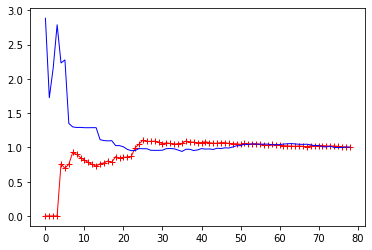

In [35]:
plot_learning_curves(poly_reg, X, y)

## Making Iris Virginica Classifier

In [36]:
from sklearn import datasets

In [37]:
iris = datasets.load_iris()

In [38]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [39]:
X = iris["data"][:, 3:]

In [40]:
y = (iris["target"]==2).astype(np.int)

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression()

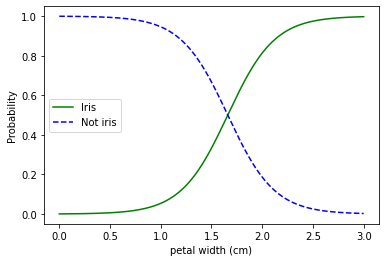

In [42]:
X_new = np.linspace(0,3,10000).reshape(-1,1)
y_proba = lr.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not iris")
plt.ylabel("Probability")
plt.xlabel("petal width (cm)")
plt.legend(loc="center left")
plt.show()

In [43]:
np.linspace(0,3,1000).shape

(1000,)

In [44]:
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99249041e-01, 7.50959011e-04],
       [9.99248065e-01, 7.51935199e-04],
       ...,
       [3.01256775e-03, 9.96987432e-01],
       [3.00866556e-03, 9.96991334e-01],
       [3.00476842e-03, 9.96995232e-01]])

## Implmenting Batch Gradient Descent with Early stopping for softmax regression

In [45]:
import numpy as np
X = iris["data"][:, (2,3)]
y = iris["target"]

In [46]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [47]:
np.random.seed(2042)

In [48]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size  = int(total_size * validation_ratio)
train_size = int(total_size - test_size - validation_size)

rnd_indices = np.random.permutation(total_size)
X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]

X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]

X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]


In [49]:
def one_hot(y):
    no_of_classes = y.max() + 1
    m = len(y)
    y_one_hot = np.zeros((m,no_of_classes))
    y_one_hot[np.arange(m), y] = 1
    return y_one_hot

In [50]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [51]:
Y_train_one_hot = one_hot(y_train)
Y_valid_one_hot = one_hot(y_valid)
Y_test_one_hot = one_hot(y_test)

#### Softmax Function

In [52]:
def softmax(logit):
    exps = np.exp(logit)
    exps_sum = np.sum(exps, axis=1, keepdims=True)
    return exps/exps_sum

In [53]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

$J(\mathbf{\Theta}) = \dfrac{1}{m}\sum\limits{i=1}^{m}\sum\limits{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

In [54]:
eta = 0.01
n_iterations = 5000
m = len(X_train)
epsilon = 1e-7

theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logit = X_train.dot(theta)
    y_proba = softmax(logit)
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(y_proba + epsilon), axis =  1))
        print(iteration, loss)
    error = y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    theta = theta - eta*gradients
    

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693313
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.4729228972192248
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.4106007142918712


In [55]:
logits = X_valid.dot(theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667